<h1><u>Лабораторная работа №3. Линейная регрессия</u></h1>

<h3>Общее задание</h3>

<p>Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
</p>
<ol>
  <li>Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).</li>
  <li>С использованием библиотеки <a href="http://scikit-learn.org/stable/">scikit-learn</a> обучить модель линейной регрессии по обучающей выборке <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py">пример</a></li>
  <li>Проверить точность модели по тестовой выборке</li>
  <li>Построить модель с использованием полиномиальной функции <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py">пример</a>. Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.
  </li>
  <li>Построить модель с использованием регуляризации <a href="https://github.com/ulstu/ml/blob/master/ml_course_en/lecture04.%20Decision%20trees.%20KNN.%20Logistic%20regression.%20Regularization/Lecture%2004-03%20Lasso_ridge.ipynb">пример</a>. На основе экспериментов подобрать параметры для регуляризации. Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.</li>
</ol>

<h2>Вариант 21 - Bike Sharing Dataset</h2>

<p>Этот набор данных содержит ежедневное количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах. </p>

<h4>Информация о признаках</h4>

<ul>
  <li>instant: Номер записи </li>
  <li>dteday : Дата записи </li>
  <ul>
    <li>yr : год (0: 2011, 1:2012)</li>
    <li>mnth : месяц ( 1 to 12)</li>
    <li>hr : час (0 to 23)</li>
  </ul>
  <li>season : Время года (1:зима, 2:весна, 3:лето, 4:осень)</li>
  <li>holiday : День является праздником или нет (1 или 0)</li>
  <li>weekday : День недели (0..6) </li>
  <li>workingday : Если день рабочий, то 1 иначе 0</li>
  <li>Погодные условия</li>
  <ol>
    <li>Clear, Few clouds, Partly cloudy, Partly cloudy</li>
    <li>Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
    <li>Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
    <li>Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
  </ol>
  <li>temp : Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (только в часовой шкале)</li>
  <li>atemp: Нормализованная температура тела в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (только в часовой шкале))</li>
  <li>hum: Нормализованная влажность. Значения делятся на 100 (макс.)</li>
  <li>windspeed: Нормализованная скорость ветра. Значения делятся на 67 (макс.)</li>
</ul>
<h4>Информация о целевых значениях</h4>
<ul>
  <li>casual: количество случайных пользователей</li>
  <li>registered: количество зарегистрированных пользователей</li>
  <li>cnt: общее число пользователей</li>
</ul>


<h3>Получаем данные из файла</h3>

In [113]:
import pandas as pd

# устанавливаем признаки и целевые значения
features = 'season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'
target = 'registered', # casual,registered,cnt

# получаем данные
data = pd.read_csv('lab3_ml/bike_sharing.csv')
data = data.loc[:, features + target]

<h3>Разделяем данные</h3>

In [114]:
scale = 0.82
split = int(data.shape[0] * scale)

train = data.loc[:split - 1, features], data.loc[:split - 1, target]
test = data.loc[split:, features].reset_index(drop=True), data.loc[split:, target].reset_index(drop=True)

<h3>Обучаем модель линейной регрессии по обучающей выборке</h3>

In [115]:
from sklearn.linear_model import LinearRegression as Model

m = Model()
m.fit(train[0], train[1])

LinearRegression()

<h3>Предсказываем целевые значения</h3>

In [116]:
# передаем обучающую и тестовую выборку признаков
predict_train = m.predict(train[0])
predict_test = m.predict(test[0])

<h3>Проверяем точность модели по тестовой выборке</h3>

In [117]:
# пределение точности модели по коэффициенту детерминации
from sklearn.metrics import r2_score

print('Коэффициент детерминации для обучающей выборки: {}'.format(r2_score(train[1], predict_train)))
print('Коэффициент детерминации для тестовой выборки: {}'.format(r2_score(test[1], predict_test)))

Коэффициент детерминации для обучающей выборки: 0.8335232133167962
Коэффициент детерминации для тестовой выборки: 0.5829913429687636


<h3>Постром модель с использованием полиномиальной функции</h3>

Степень полинома: 1
Коэффициент детерминации для обучающей выборки: 0.8335232133167962 и тестовой выборки 0.5829913429687638
Степень полинома: 2
Коэффициент детерминации для обучающей выборки: 0.9183292896236676 и тестовой выборки 0.6481623801209417
Степень полинома: 3
Коэффициент детерминации для обучающей выборки: 0.9671447217739069 и тестовой выборки -7.762316903164644


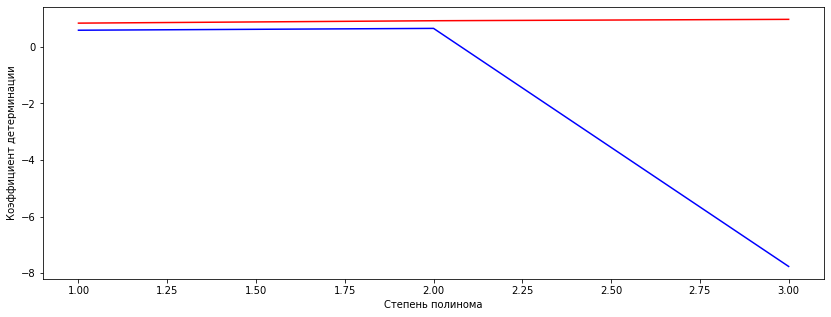

In [120]:
from sklearn.preprocessing import PolynomialFeatures as PModel
from sklearn.linear_model import LinearRegression as LModel
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

degrees = (1, 2, 3) # степень полинома
plt.figure(figsize=(14, 5))

train_pred_list = []
test_pred_list = []

for _, degree in enumerate(degrees):
  polynomial_features = PModel(degree=degree, include_bias=False)
  linear_regression = LModel()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  
  # Обучение модели
  pipeline.fit(train[0], train[1])

  # Предсказываем целевые значения
  predict_train = pipeline.predict(train[0])
  predict_test = pipeline.predict(test[0])

  train_pred_list.append(r2_score(train[1], predict_train))
  test_pred_list.append(r2_score(test[1], predict_test))


  print(f'Степень полинома: {degree}')
  print(f'Коэффициент детерминации для обучающей выборки: {train_pred_list[-1]} \
и тестовой выборки {test_pred_list[-1]}')

plt.xlabel("Степень полинома")
plt.ylabel("Коэффициент детерминации")
plt.plot(degrees, train_pred_list, "r-", degrees, test_pred_list,"b-")
plt.show()